# 6.4 Maching Learning Task

## Import libraries and data

In [3]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# Import happiness dataframe

path = r'C:\Users\lefev\Documents\Data Analytics Course\Achievement 6'

In [8]:
df = pd.read_csv(os.path.join(path, 'Data', 'combined_happiness_data.csv'), index_col=False)

## Clean data double check - data was cleaned in previous exercises

In [11]:
df.head(20)

Happiness Rank               Country  Score  GDP per capita  \
0              1.0           Switzerland  7.587         1.39651   
1              2.0               Iceland  7.561         1.30232   
2              3.0               Denmark  7.527         1.32548   
3              4.0                Norway  7.522         1.45900   
4              5.0                Canada  7.427         1.32629   
5              6.0               Finland  7.406         1.29025   
6              7.0           Netherlands  7.378         1.32944   
7              8.0                Sweden  7.364         1.33171   
8              9.0           New Zealand  7.286         1.25018   
9             10.0             Australia  7.284         1.33358   
10            11.0                Israel  7.278         1.22857   
11            12.0            Costa Rica  7.226         0.95578   
12            13.0               Austria  7.200         1.33723   
13            14.0                Mexico  7.187         1.02054   
14            15.0         United States  7.119         1.39451   
15            16.0                Brazil  6.983         0.98124   
16            17.0            Luxembourg  6.946         1.56391   
17            18.0               Ireland  6.940         1.33596   
18            19.0               Belgium  6.937         1.30782   
19            20.0  United Arab Emirates  6.901         1.42727   

    Social support  Healthy life expectancy  Freedom to make life choices  \
0          1.34951                  0.94143                       0.66557   
1          1.40223                  0.94784                       0.62877   
2          1.36058                  0.87464                       0.64938   
3          1.33095                  0.88521                       0.66973   
4          1.32261                  0.90563                       0.63297   
5          1.31826                  0.88911                       0.64169   
6          1.28017                  0.89284                       0.61576   
7          1.28907                  0.91087                       0.65980   
8          1.31967                  0.90837                       0.63938   
9          1.30923                  0.93156                       0.65124   
10         1.22393                  0.91387                       0.41319   
11         1.23788                  0.86027                       0.63376   
12         1.29704                  0.89042                       0.62433   
13         0.91451                  0.81444                       0.48181   
14         1.24711                  0.86179                       0.54604   
15         1.23287                  0.69702                       0.49049   
16         1.21963                  0.91894                       0.61583   
17         1.36948                  0.89533                       0.61777   
18         1.28566                  0.89667                       0.58450   
19         1.12575                  0.80925                       0.64157   

    Generosity  Perceptions of corruption  Year Happiness Level  
0      0.41978                    0.29678  2015            High  
1      0.14145                    0.43630  2015            High  
2      0.48357                    0.34139  2015            High  
3      0.36503                    0.34699  2015            High  
4      0.32957                    0.45811  2015            High  
5      0.41372                    0.23351  2015            High  
6      0.31814                    0.47610  2015            High  
7      0.43844                    0.36262  2015            High  
8      0.42922                    0.47501  2015            High  
9      0.35637                    0.43562  2015            High  
10     0.07785                    0.33172  2015            High  
11     0.10583                    0.25497  2015            High  
12     0.18676                    0.33088  2015            High  
13     0.21312                    0.14074  2015       

In [13]:
df.shape

(782, 11)

In [17]:
# Check for missing values

df.isnull().sum() # will leave one null as it's insignificant

Happiness Rank                  0
Country                         0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
Year                            0
Happiness Level                 0
dtype: int64

## Data prep for regression analysis

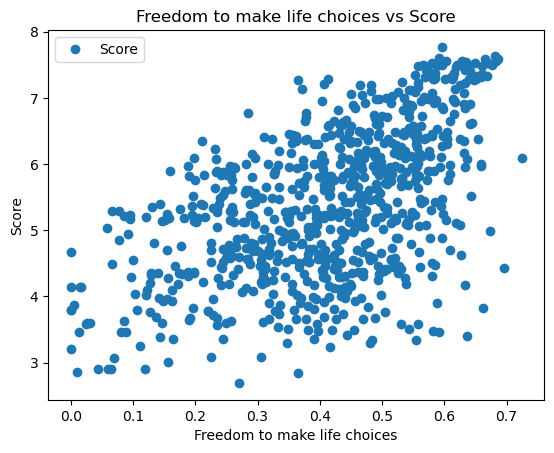

In [20]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x='Freedom to make life choices', y='Score', style='o')
plt.title('Freedom to make life choices vs Score')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Score')
plt.show()

## Hypothesis is that Freedom to make life choices plays a moderate role in a countries' happiness

In [23]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Freedom to make life choices'].values.reshape(-1,1)
y = df['Score'].values.reshape(-1,1)

In [27]:
X

array([[0.66557   ],
       [0.62877   ],
       [0.64938   ],
       [0.66973   ],
       [0.63297   ],
       [0.64169   ],
       [0.61576   ],
       [0.6598    ],
       [0.63938   ],
       [0.65124   ],
       [0.41319   ],
       [0.63376   ],
       [0.62433   ],
       [0.48181   ],
       [0.54604   ],
       [0.49049   ],
       [0.61583   ],
       [0.61777   ],
       [0.5845    ],
       [0.64157   ],
       [0.59625   ],
       [0.63274   ],
       [0.42908   ],
       [0.54252   ],
       [0.5421    ],
       [0.61477   ],
       [0.44132   ],
       [0.6404    ],
       [0.55011   ],
       [0.44974   ],
       [0.46364   ],
       [0.60362   ],
       [0.53466   ],
       [0.55664   ],
       [0.31048   ],
       [0.45951   ],
       [0.60365   ],
       [0.3974    ],
       [0.55499   ],
       [0.59657   ],
       [0.55884   ],
       [0.4035    ],
       [0.57733   ],
       [0.65821   ],
       [0.31751   ],
       [0.49615   ],
       [0.33208   ],
       [0.485

In [29]:
y

array([[7.587     ],
       [7.561     ],
       [7.527     ],
       [7.522     ],
       [7.427     ],
       [7.406     ],
       [7.378     ],
       [7.364     ],
       [7.286     ],
       [7.284     ],
       [7.278     ],
       [7.226     ],
       [7.2       ],
       [7.187     ],
       [7.119     ],
       [6.983     ],
       [6.946     ],
       [6.94      ],
       [6.937     ],
       [6.901     ],
       [6.867     ],
       [6.853     ],
       [6.81      ],
       [6.798     ],
       [6.786     ],
       [6.75      ],
       [6.67      ],
       [6.611     ],
       [6.575     ],
       [6.574     ],
       [6.505     ],
       [6.485     ],
       [6.477     ],
       [6.455     ],
       [6.411     ],
       [6.329     ],
       [6.302     ],
       [6.298     ],
       [6.295     ],
       [6.269     ],
       [6.168     ],
       [6.13      ],
       [6.123     ],
       [6.003     ],
       [5.995     ],
       [5.987     ],
       [5.984     ],
       [5.975

In [31]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regression Analysis

In [34]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [36]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [38]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

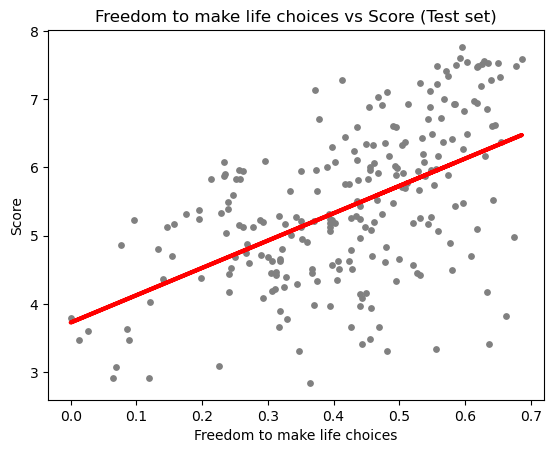

In [40]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Freedom to make life choices vs Score (Test set)')
plot_test.xlabel('Freedom to make life choices')
plot_test.ylabel('Score')
plot_test.show()

## The line apears to fine the data somewhat, as I expected from the coefficient information found in the previous exercise. There are a good number of data points scattered far away from the regression line, so there is a lot of variance. 

In [42]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score

In [44]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4.00888106]]
Mean squared error:  0.9166426188158068
R2 score:  0.30249667614916287


In [46]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

Actual  Predicted
0    5.525   5.592213
1    6.886   5.918002
2    6.344   5.528141
3    7.119   5.914153
4    3.781   5.043184
5    4.692   4.724649
6    4.390   5.036048
7    5.061   5.968273
8    6.929   5.783865
9    5.488   4.683547
10   6.485   6.144985
11   5.389   4.682826
12   3.334   5.950073
13   5.125   5.308652
14   2.905   4.200196
15   5.835   4.734099
16   4.190   4.954322
17   4.376   4.520118
18   4.800   5.012476
19   5.430   6.071200
20   6.375   5.997338
21   3.975   5.208430
22   4.700   6.166553
23   6.199   5.873904
24   6.611   6.292431
25   7.228   5.958091
26   5.762   5.420901
27   7.600   6.098402
28   3.657   5.432778
29   6.923   5.621345

## The model did ok. It was tough as the R2 score was not high (.3). The y numbers for predicted tend to be a bit all over. Some y numbers from predicted to actual are close, and at times there are some large differences. Overall not great though. 

## Not sure what a major impact of bias might be. One possible issue is the cultural understanding of "freedom to make life choices" and how survey takers are ranking that answer. It is quite more subjective than maybe the GDP per capita variable. Therefore, we have a great variance and lower R2 score. 